In [4]:

!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:

!kaggle datasets download anshtanwar/jellyfish-types

Dataset URL: https://www.kaggle.com/datasets/anshtanwar/jellyfish-types
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/25.5M [00:00<?, ?B/s]
100% 25.5M/25.5M [00:00<00:00, 1.33GB/s]


In [6]:


import zipfile

zip_ref = zipfile.ZipFile('/content/jellyfish-types.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


Data Preparation

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
train_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/Train_Test_Valid/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128,128)
)

Found 900 files belonging to 6 classes.


In [3]:
test_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/Train_Test_Valid/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128,128)
)
valid_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/Train_Test_Valid/valid',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128,128)
)

Found 40 files belonging to 6 classes.
Found 39 files belonging to 6 classes.


In [4]:
class_names=train_dataset.class_names
print(class_names)

['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']


In [5]:
#normalizing

def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label

train_dataset=train_dataset.map(process)
test_dataset=test_dataset.map(process)
valid_dataset=valid_dataset.map(process)

# Model Building

In [6]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [12]:


model =Sequential()
model.add(Input(shape=(128, 128, 3)))

#conv layers
model.add(Conv2D(16, (5, 5), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_regularizer =
tf.keras.regularizers.l1_l2()))

model.add(Dense(64, activation = 'relu', kernel_regularizer =
tf.keras.regularizers.l1_l2()))
model.add(Dropout(0.2))

model.add(Dense(32, activation = 'relu', kernel_regularizer =
tf.keras.regularizers.l1_l2()))
model.add(Dropout(0.2))
model.add(Dense(len(class_names),activation="softmax"))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:

early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Fit model
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=30, batch_size=32, callbacks=[early_stop])


Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4668 - loss: 1.3453 - val_accuracy: 0.5128 - val_loss: 1.2252
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4620 - loss: 1.3529 - val_accuracy: 0.4872 - val_loss: 1.1311
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5443 - loss: 1.1886 - val_accuracy: 0.5128 - val_loss: 1.1721
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6069 - loss: 1.0560 - val_accuracy: 0.5128 - val_loss: 1.2999
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6285 - loss: 0.9581 - val_accuracy: 0.5385 - val_loss: 1.2675
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6926 - loss: 0.8766 - val_accuracy: 0.4615 - val_loss: 1.4454
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6938 - loss: 0.8062 - val_accuracy: 0.4615 - val_loss: 1.7174
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7032 - loss: 0.8225 - val_accuracy: 0.4872 - v

In [16]:
test_loss,test_acc=model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step - accuracy: 0.4625 - loss: 1.1792
Test Loss: 1.1602861881256104
Test Accuracy: 0.4749999940395355


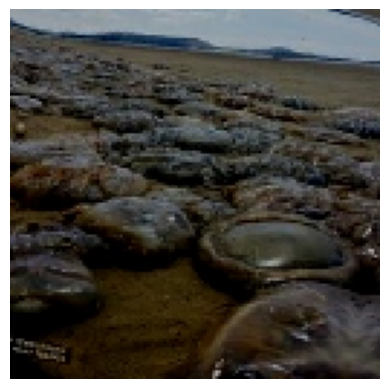

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.01613797 0.08263336 0.0391571  0.21156822 0.3203012  0.33020216]]
mauve_stinger_jellyfish


In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


img_path = "/content/barrel_jellyfish/aug-101-25.jpg"
img = image.load_img(img_path, target_size=(128, 128))


plt.imshow(img)
plt.axis('off')
plt.show()

# Convert to array and normalize
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

print(prediction)
print(class_names[predicted_class_index])

In [18]:
class_names

['Moon_jellyfish',
 'barrel_jellyfish',
 'blue_jellyfish',
 'compass_jellyfish',
 'lions_mane_jellyfish',
 'mauve_stinger_jellyfish']

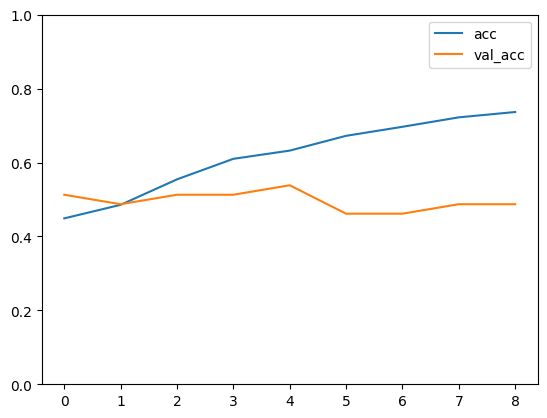

In [21]:




acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
n = len(acc)
plt.ylim(0.0, 1.0)
plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.legend()